In [117]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer, StandardScaler
from math import sqrt

In [56]:
%matplotlib inline

In [57]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
dd = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx)
print(dd)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [58]:
df = pd.DataFrame(pd.read_sql_query("SELECT * FROM Player_Attributes", cnx))

In [71]:
df.head()

,id,player_fifa_api_id,player_api_id,date,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [61]:
target = df.pop('overall_rating')
df.shape

(183978, 41)

#calculat missing data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 41 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
sprint

In [15]:
target.isnull().values.sum()

836

In [62]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

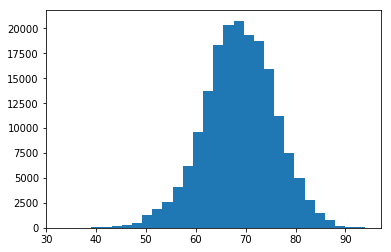

In [63]:
plt.hist(target, 30, range=(33, 94))

In [81]:
y = target.fillna(target.mean())

In [82]:
y.isnull().values.sum()

0

In [83]:
y.isnull().values.any()

False

In [84]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [72]:

for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}\t\t\t{unique_cat}\t\t\t{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))



id			183978			int64
player_fifa_api_id			11062			int64
player_api_id			11060			int64
date			197			object
potential			57			float64
preferred_foot			3			object
attacking_work_rate			9			object
defensive_work_rate			20			object
crossing			96			float64
finishing			98			float64
heading_accuracy			97			float64
short_passing			96			float64
volleys			94			float64
dribbling			98			float64
curve			93			float64
free_kick_accuracy			98			float64
long_passing			96			float64
ball_control			94			float64
acceleration			87			float64
sprint_speed			86			float64
agility			82			float64
reactions			79			float64
balance			82			float64
shot_power			97			float64
jumping			80			float64
stamina			85			float64
strength			83			float64
long_shots			97			float64
aggression			92			float64
interceptions			97			float64
positioning			96			float64
vision			98			float64
penalties			95			float64
marking			96			float64
standing_tackle			96			float64
sliding_tackle			95			float64
gk_diving			94			float64
gk_handling			91			

## Train and Test Split

**One Hot Encoding**

One Hot Encoding is the process of splitting categorical levels to multiple columns

In [85]:
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
dummy_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_r

In [87]:
X  = dummy_df.drop(['id', 'date'], axis=1)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
"""imput = Imputer()
x_train = imput.fit_transform(x_train)
x_test = imput.fit_transform(x_test)
"""

'imput = Imputer()\nx_train = imput.fit_transform(x_train)\nx_test = imput.fit_transform(x_test)\n'

In [116]:
x_train

array([[1.00000e+00, 2.22537e+05, 5.32766e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.10462e+05, 2.87645e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.74859e+05, 2.82713e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 5.38690e+04, 2.32820e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.89431e+05, 1.19760e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.77509e+05, 4.68750e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [109]:
print(x_test.shape)
print(y_test.shape)

(45995, 66)
(45995,)


## Fitting Regression Model

### Using StatsModel

In [93]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [110]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.445e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        01:57:04   Log-Likelihood:            -3.2860e+05
No. Observations:              137983   AIC:                         6.573e+05
Df Residuals:                  137923   BIC:                         6.579e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2218      0.150     -1.482      0.138      -0.515       0.071
x1         -8.376e-06   1.72e-07    -48.668      0.000   -8.71e-06   -8.04e-06
x2         -6.414e-06   7.04e-08    -91.170      0.000   -6.55e-06   -6.28e-06
x3             0.4461      0.002    267.400      0.000       0.443       0.449
x4             0.0063      0.001      6.924      0.000       0.005       0.008
x5             0.0143      0.001     14.474      0.000       0.012       0.016
x6             0.0569      0.001     64.607      0.000       0.055       0.059
x7             0.0569      0.001     38.470      0.000       0.054       0.060
x8            -0.0065      0.001     -7.294      0.000      -0.008      -0.005
x9             0.0101      0.001      8.018      0.000       0.008       0.013
x10            0.0115      0.001     13.357      0.000       0.010       0.013
x11            0.0086      0.001     11.261      0.000       0.007       0.010
x12            0.0097      0.001      9.653      0.000       0.008       0.012
x13            0.1125      0.002     65.795      0.000       0.109       0.116
x14            0.0102      0.001      6.864      0.000       0.007       0.013
x15            0.0172      0.001     12.166      0.000       0.014       0.020
x16           -0.0117      0.001    -10.657      0.000      -0.014      -0.010
x17            0.1739      0.001    145.942      0.000       0.172       0.176
x18            0.0046      0.001      5.466      0.000       0.003       0.006
x19            0.0118      0.001     12.485      0.000       0.010       0.014
x20            0.0114      0.001     14.366      0.000       0.010       0.013
x21           -0.0013      0.001     -1.504      0.133      -0.003       0.000
x22            0.0497      0.001     54.763      0.000       0.048       0.051
x23           -0.0102      0.001    -10.393      0.000      -0.012      -0.008
x24            0.0107      0.001     14.342      0.000       0.009       0.012
x25            0.0035      0.001      4.397      0.000       0.002       0.005
x26           -0.0049      0.001     -5.704      0.000      -0.007      -0.003
x27           -0.0180      0.001    -19.011      0.000      -0.020      -0.016
x28            0.0075      0.001      9.291      0.000       0.006       0.009
x29            0.0261      0.001     21.789      0.000       0.024       0.028
x30            0.0091      0.001      6.622      0.000       0.006       0.012
x31           -0.0201      0.001    -17.603      0.000      -0.022      -0.018
x32            0.1620      0.002    102.884      0.000       0.159       0.165
x33            0.0242      0.002     11.679      0.000       0.020       0.028
x34           -0.0439      0.001    -65.206      0.000      -0.045      -0.043
x35            0.0470      0.002     22.738      0.000       0.043       0.051
x3

In [119]:
lm = LinearRegression()

In [121]:
x_train

array([[1.00000e+00, 2.22537e+05, 5.32766e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.10462e+05, 2.87645e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.74859e+05, 2.82713e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 5.38690e+04, 2.32820e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.89431e+05, 1.19760e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.77509e+05, 4.68750e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [104]:
model = lm.fit(x_train.values, y_train.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'